# Rock Scissor Paper Classification

## Import Library

In [14]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
!pip install pillow   

from PIL import Image
import os, glob
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## Resize of Images

In [7]:
# directory
dir_r = "/aiffel/rock_scissor_paper"
dir_var = ["/scissor*","/rock*", "/paper*"]

dir_path=[]
images=[0,1,2]
for i in range(0,3):
    dir_path.append(os.getenv("HOME") + dir_r + dir_var[i])
    images[i]=glob.glob(dir_path[i] + "/*.jpg")
    print(len(images[i]))


# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for i in range(0,3):
    for img in images[i]:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

2300
2300
2300
가위 이미지 resize 완료!


## Import Images

In [10]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=2300*3   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    srp_var = ['/scissor*/*.jpg','/rock*/*.jpg','/paper*/*.jpg']
    
    for i in range(0,3):
        for file in glob.iglob(img_path+srp_var[i]):
            img = np.array(Image.open(file),dtype=np.int32)
            imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
            labels[idx]=i   # 가위 : 0
            idx=idx+1
        
    print("학습데이터(x_total)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_total, y_total)=load_data(image_dir_path)
x_total_norm = x_total/255.0   # 입력은 0~1 사이의 값으로 정규화


학습데이터(x_total)의 이미지 개수는 6900 입니다.


## Split the train and test data

In [11]:
# train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_total_norm, y_total, test_size=0.2, shuffle=True, stratify=y_total, random_state=34)

print("x_train shape: {}".format(x_train.shape))
print("x_test shape: {}".format(x_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

x_train shape: (5520, 28, 28, 3)
x_test shape: (1380, 28, 28, 3)
y_train shape: (5520,)
y_test shape: (1380,)


## Check the images

라벨:  1


(5520,)

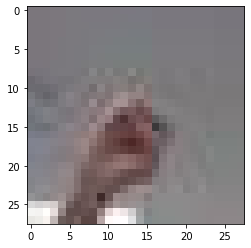

In [12]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])
y_train.shape

## Deep Learning Network

In [16]:
n_channel_1=15
n_channel_2=25
n_dense=25
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
#model.add(keras.layers.Dropout(rate=0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 15)        420       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 15)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 25)        3400      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 25)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 625)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                15650     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               